In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
%matplotlib inline

In [190]:
#load provided csv file
df = pd.read_csv("fev.csv")
df

,age,height,sex,smoke,fev
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895
...,...,...,...,...,...
649,16,67.0,1,1,4.270
650,15,68.0,1,1,3.727
651,18,60.0,0,0,2.853
652,16,63.0,0,1,2.795


In [191]:
df.describe()

,age,height,sex,smoke,fev
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,9.931193,61.143578,0.513761,0.099388,2.636780
std,2.953935,5.703513,0.500193,0.299412,0.867059
min,3.000000,46.000000,0.000000,0.000000,0.791000
25%,8.000000,57.000000,0.000000,0.000000,1.981000
50%,10.000000,61.500000,1.000000,0.000000,2.547500
75%,12.000000,65.500000,1.000000,0.000000,3.118500
max,19.000000,74.000000,1.000000,1.000000,5.793000


In [192]:
#4 subgroups can be created with the two categorical variables
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]

In [165]:
df_F_nonsmoker.describe()

,age,height,sex,smoke,fev
count,279.000000,279.000000,279.0,279.0,279.000000
mean,9.365591,59.605376,0.0,0.0,2.379211
std,2.693390,4.738660,0.0,0.0,0.639263
min,3.000000,46.000000,0.0,0.0,0.791000
25%,8.000000,57.000000,0.0,0.0,1.877500
50%,9.000000,60.500000,0.0,0.0,2.417000
75%,11.000000,63.000000,0.0,0.0,2.865000
max,18.000000,71.000000,0.0,0.0,3.816000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

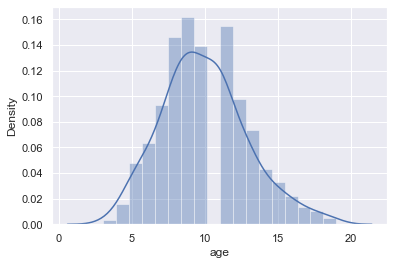

In [166]:
sns.distplot(df.age)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

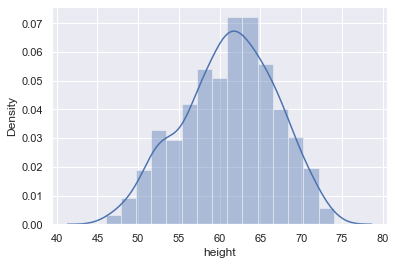

In [167]:
sns.distplot(df.height)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fev', ylabel='Density'>

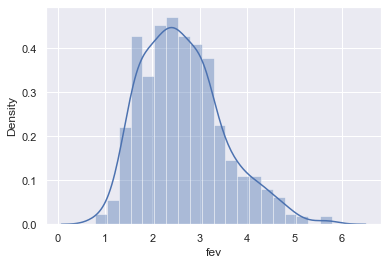

In [168]:
sns.distplot(df.fev)

In [169]:
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)

<ipython-input-169-fbb5e2cae805>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_nonsmoker['Name'] = ('Female Non-Smoker')
<ipython-input-169-fbb5e2cae805>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_smoker['Name'] = ('Female Smoker')
<ipython-input-169-fbb5e2cae805>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

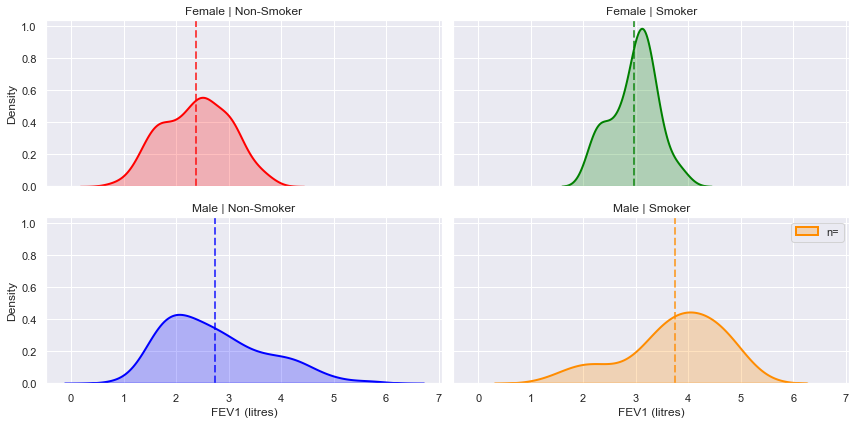

In [170]:

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12,6), tight_layout=True, sharex=True, sharey=True)

sns.kdeplot(df_F_nonsmoker.fev, ax=ax[0,0], legend=True, color="red", shade=True, linewidth=2, label="n=")
ax[0,0].axvline(x=df_F_nonsmoker.fev.mean(), linestyle = '--', alpha =0.7, color="red", linewidth=2)
ax[0,0].set_xlabel("FEV1 (litres)")
ax[0,0].set_ylabel("Density")
ax[0,0].set_title("Female | Non-Smoker")

sns.kdeplot(df_F_smoker.fev, ax=ax[0,1], legend=True, color="green", shade=True, linewidth=2, label="n=")
ax[0,1].axvline(x=df_F_smoker.fev.mean(), linestyle = '--', alpha =0.7, color="green", linewidth=2)
ax[0,1].set_xlabel("FEV1 (litres)")
ax[0,1].set_title("Female | Smoker")

sns.kdeplot(df_M_nonsmoker.fev, ax=ax[1,0], legend=True, color="blue", shade=True, linewidth=2, label="n=")
ax[1,0].axvline(x=df_M_nonsmoker.fev.mean(), linestyle = '--', alpha =0.7, color="blue", linewidth=2)
ax[1,0].set_xlabel("FEV1 (litres)")
ax[1,0].set_ylabel("Density")
ax[1,0].set_title("Male | Non-Smoker")

sns.kdeplot(df_M_smoker.fev, ax=ax[1,1], legend=True, color="darkorange", shade=True, linewidth=2, label="n=")
ax[1,1].axvline(x=df_M_smoker.fev.mean(), linestyle = '--', alpha =0.7, color="darkorange", linewidth=2)
ax[1,1].set_xlabel("FEV1 (litres)")
ax[1,1].set_title("Male | Smoker")

plt.legend()
plt.show()

In [171]:
df


,age,height,sex,smoke,fev,Name
0,9,57.0,0,0,1.708,Female Non-Smoker
1,8,67.5,0,0,1.724,Female Non-Smoker
2,7,54.5,0,0,1.720,Female Non-Smoker
5,8,61.0,0,0,2.336,Female Non-Smoker
6,6,58.0,0,0,1.919,Female Non-Smoker
...,...,...,...,...,...,...
639,16,69.5,1,1,4.070,Male Smoker
644,18,70.5,1,1,4.404,Male Smoker
648,16,72.0,1,1,4.872,Male Smoker
649,16,67.0,1,1,4.270,Male Smoker


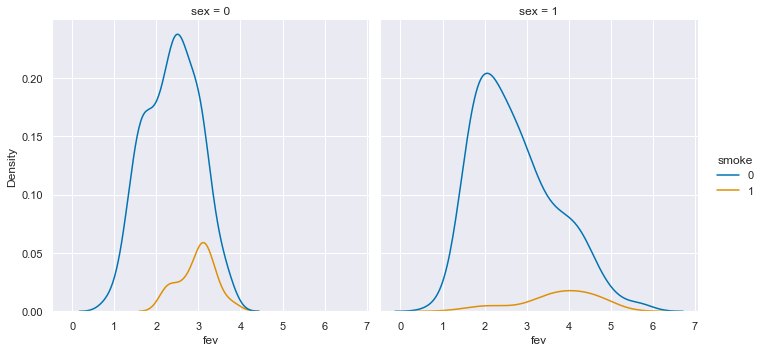

In [172]:
sns.displot(data=df, x="fev", hue="smoke", col="sex", kind="kde", palette="colorblind")
#place mean lines


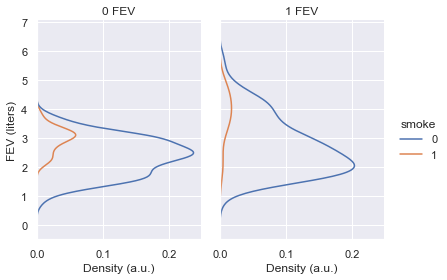

In [173]:
g = sns.displot(data=df, y="fev", hue="smoke", col="sex",kind="kde", height=4, aspect=.7)
g.set_axis_labels("Density (a.u.)", "FEV (liters)")
g.set_titles("{col_name} FEV")

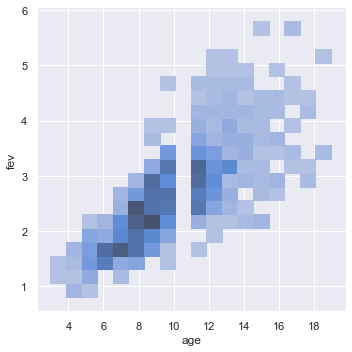

In [175]:
sns.displot(data=df, x="age", y="fev")

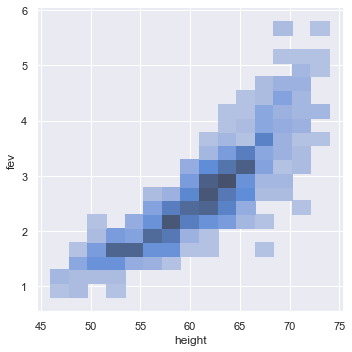

In [176]:
sns.displot(data=df, x="height", y="fev")

(0.0, 14.0)

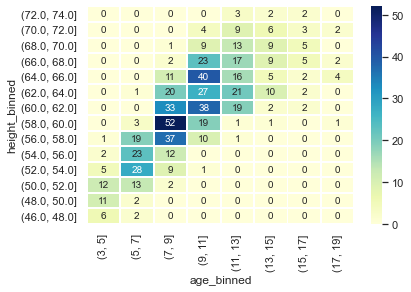

In [177]:
#height min and max
height_min = min(df['height'])
height_max = max(df['height'])

#age min and max
age_min = min(df['age'])
age_max = max(df['age'])

height_bins_step = 2
height_bins = np.arange(height_min, height_max+height_bins_step, height_bins_step)

age_bins_step = 2
age_bins = np.arange(age_min, age_max+age_bins_step, age_bins_step)

df['height_binned'] = pd.cut(df['height'], height_bins)
df['age_binned'] = pd.cut(df['age'], age_bins)

df_new = df.groupby(['height_binned', 'age_binned']).size().reset_index(name='count') #wrangle count data

df_new = df_new.pivot("height_binned", "age_binned", "count")
ax = sns.heatmap(df_new, annot=True, fmt="d", cmap="YlGnBu", linewidths=1.0)

plt.ylim(reversed(plt.ylim()))

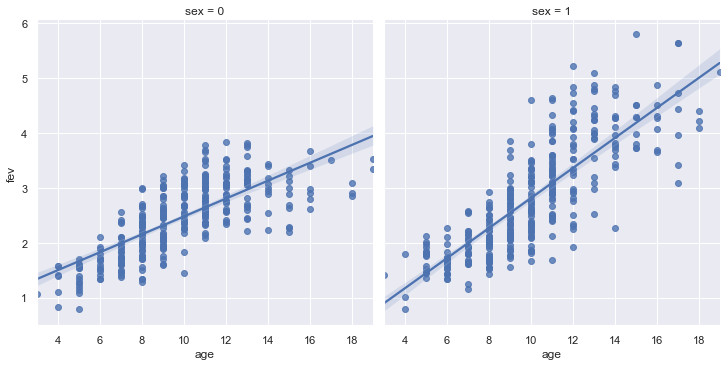

In [178]:
sns.lmplot(x="age", y="fev" ,data=df, col='sex')

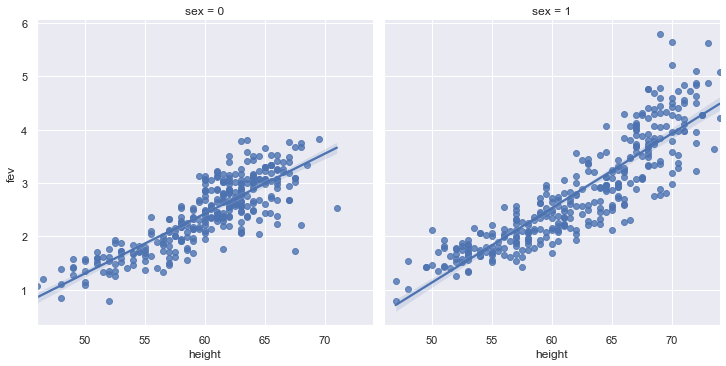

In [179]:
sns.lmplot(x="height", y="fev" ,data=df, col='sex')

In [180]:
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df_F = pd.concat([df_F_nonsmoker, df_F_smoker], axis=0)

df_M = pd.concat([df_M_nonsmoker, df_M_smoker], axis=0)

<ipython-input-180-e564a4629f5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_nonsmoker['Name'] = ('Female Non-Smoker')
<ipython-input-180-e564a4629f5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_smoker['Name'] = ('Female Smoker')
<ipython-input-180-e564a4629f5d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

<Figure size 1080x576 with 0 Axes>

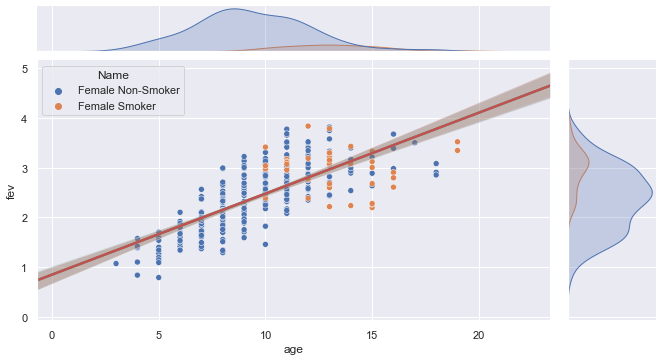

In [181]:
plt.figure(figsize = (15,8))
g = sns.jointplot(data=df_F, x="age", y="fev", hue="Name")

for _,gr in df.groupby("Name"):
    sns.regplot(x="age", y="fev", data=df_F, scatter=False, ax=g.ax_joint, truncate=False)

g.fig.set_size_inches(10,5)
plt.show()

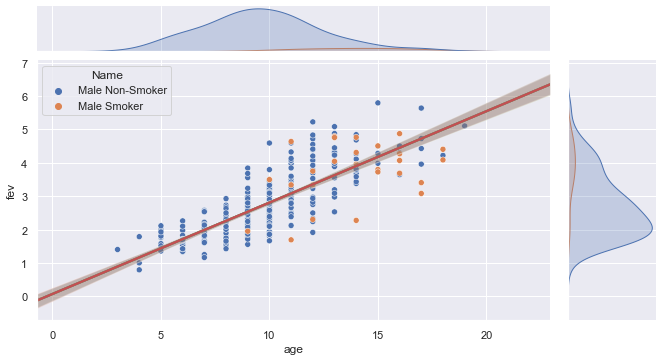

In [182]:


g = sns.jointplot(data=df_M, x="age", y="fev", hue="Name")

for _,gr in df.groupby("Name"):
    sns.regplot(x="age", y="fev", data=df_M, scatter=False, ax=g.ax_joint, truncate=False)

g.fig.set_size_inches(10,5)
plt.show()

In [193]:

df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)






<ipython-input-193-6d83f8cf80e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_nonsmoker['Name'] = ('Female Non-Smoker')
<ipython-input-193-6d83f8cf80e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_smoker['Name'] = ('Female Smoker')
<ipython-input-193-6d83f8cf80e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [196]:

fig = px.scatter_3d(df, x='age', y='fev', z='height',
              color='Name')
fig.show()

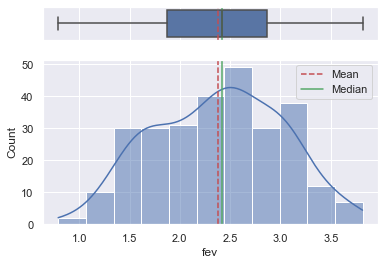

In [200]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_F_nonsmoker['fev'].mean()
median=df_F_nonsmoker['fev'].median()
mode=df_F_nonsmoker['fev'].mode().values[0]

sns.boxplot(data=df_F_nonsmoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(data=df_F_nonsmoker, x="fev", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

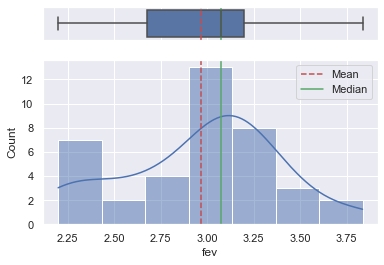

In [201]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_F_smoker['fev'].mean()
median=df_F_smoker['fev'].median()
mode=df_F_smoker['fev'].mode().values[0]

sns.boxplot(data=df_F_smoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(data=df_F_smoker, x="fev", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

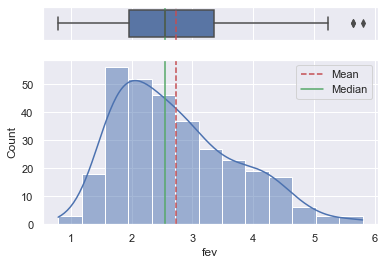

In [202]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_M_nonsmoker['fev'].mean()
median=df_M_nonsmoker['fev'].median()
mode=df_M_nonsmoker['fev'].mode().values[0]

sns.boxplot(data=df_M_nonsmoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(data=df_M_nonsmoker, x="fev", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

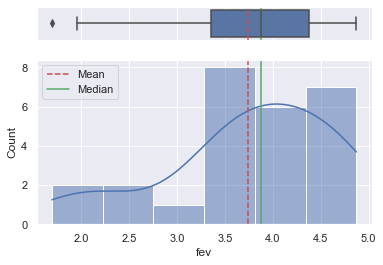

In [203]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_M_smoker['fev'].mean()
median=df_M_smoker['fev'].median()
mode=df_M_smoker['fev'].mode().values[0]

sns.boxplot(data=df_M_smoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(data=df_M_smoker, x="fev", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In [ ]:
#make a sns grid cut be age categories ()